In [3]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import display, Audio

In [178]:
wav, sr = librosa.load('new.wav', sr=16000)

S_full, phase = librosa.magphase(librosa.stft(wav))

In [179]:
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))

S_filter = np.minimum(S_full, S_filter)

In [180]:
#margin_i, margin_v = 15, 2
margin_i, margin_v = 20, 0.5
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)


S_foreground = mask_v * S_full
S_background = mask_i * S_full

In [181]:
y_0 = librosa.istft(S_background*phase)
y_1 = librosa.istft(S_foreground*phase)
y_2 = librosa.istft((S_full-S_foreground)*phase)

yy = wav[0:len(y_1)] - y_1

display(Audio(wav, rate=sr))
display(Audio(y_0, rate=sr))
display(Audio(y_1, rate=sr))
display(Audio(yy, rate=sr))
display(Audio(y_2, rate=sr))

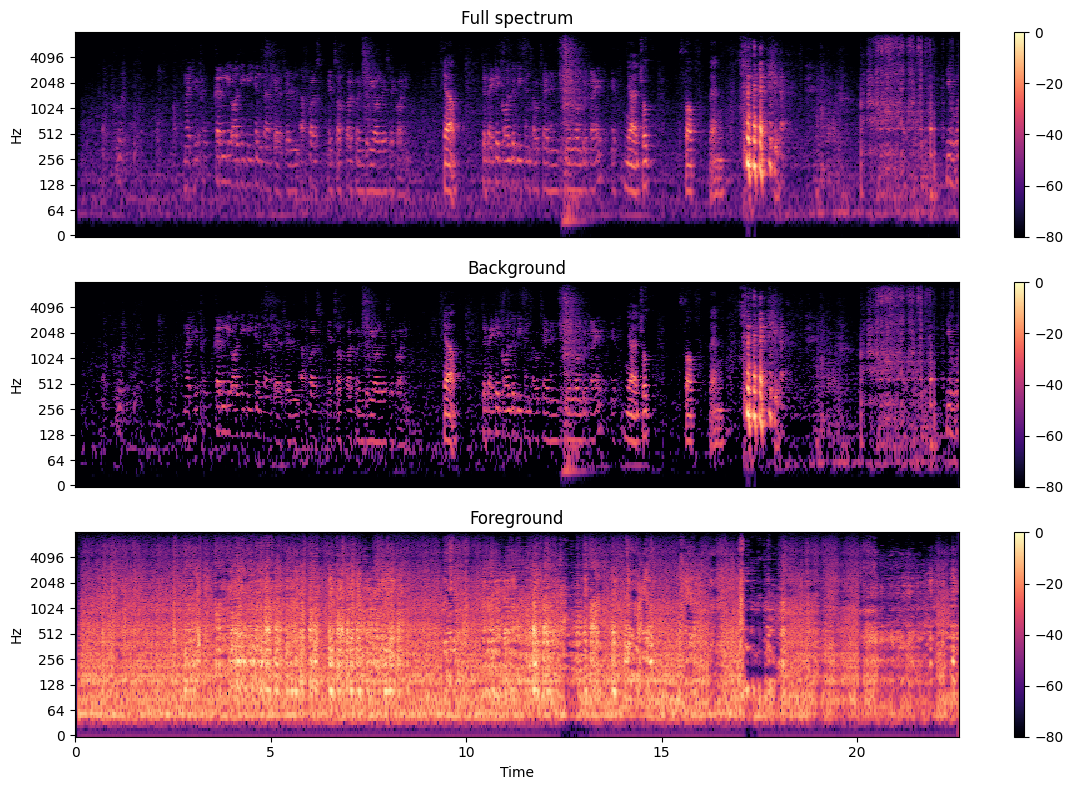

In [182]:
S_ext, phase = librosa.magphase(librosa.stft(yy/2))

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S_full, ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Full spectrum')
plt.colorbar()

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S_foreground, ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Background')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(S_ext, ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.title('Foreground')
plt.colorbar()

plt.tight_layout()
plt.show()